A protein is a large molecule made up of a chain of building blocks called monomers. Let us consider one containing two different monomers. One is a non-polar hydrophobic (H) monomer that is repelled by the surrounding water. The other is a polar (P) monomer that is attracted by the water. The spatial structure of the protein results from a folding process in which random coils of chains rearrange themselves into a configuration of minimum energy E. Our goal now is to create a variation on the random walk problem that models the folding process and produces the lowest energy state of a H–P-sequence of various lengths, see Fig. 1. The random walk can only visit the nodes of a regular 2D square lattice, and each node can only be visited once, i.e. the random walk is self-avoiding. We take the energy of the protein to be E = −ϵf, where ϵ is a positive constant, and f is the number of H–H neighbours on the lattice that are not direct neighbours on the chain. Accordingly, we expect the natural states of H–P sequences to be those with the largest possible number f of H–H contacts.

Set up the random walk on a regular 2D square lattice with 31 grid points in each
dimension. If the point (1, 1) denotes the corner in the lower left, then (16, 16) is
the centre of the grid. Begin by placing a random monomer at the centre. For the
probability of an H monomer, use pH = 0.7. Accordingly, the probability of a P
monomer is pP = 1 − pH = 0.3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

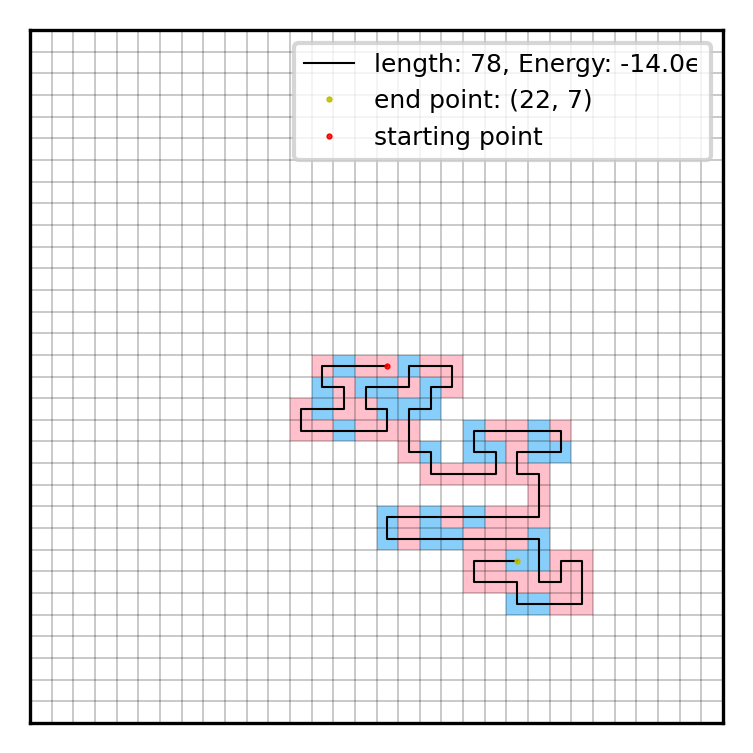

In [7]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
GRID_SIZE = 1
GRID_WIDTH = 31
GRID_HEIGHT = 31
    
def grid_setup(grid_width, grid_height, grid_size, axis):
    #Grid setup
    for x in range(grid_width + 2):
        axis.axvline(x=grid_size * x, color='k', linewidth=0.1)
    for y in range(grid_height + 2):
        axis.axhline(y=grid_size * y, color='k', linewidth=0.1)
    axis.set_aspect('equal')
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlim(0, GRID_WIDTH+1)
    axis.set_ylim(0, GRID_HEIGHT+1)

#Monomers
dict_cols = {"H": "pink", "P": "lightskyblue"}    

def fill_square(x,y,col):
    x_coord = x * GRID_SIZE
    y_coord = y * GRID_SIZE
    rect = patches.Rectangle((x_coord, y_coord), GRID_SIZE, GRID_SIZE, facecolor=col)
    ax.add_patch(rect)
    
def set_monomer(x, y):
    if np.random.random() < 0.7:
        monomer_type = "H"
    else:
        monomer_type = "P"
    list_monomers.append(monomer_type)
    dict_monomers[monomer_type].append((x,y))
    fill_square(x,y,dict_cols[monomer_type])
    list_occupied.append((x,y))
    
def check_if_occupied(x,y):
        if (x, y) in list_occupied:
            return True
        elif x > GRID_WIDTH or y > GRID_HEIGHT or x < 0 or y < 0:
            return True
        else:
            return False
 
def look_for_neighbor(x,y):
    steps = [-1,0,1]
    dx= np.random.choice(steps)
    dy= np.random.choice(steps) if dx == 0 else 0
    while check_if_occupied(x + dx, y + dy):     
        #print(f"Already occupied:{dx,dy}")
        dx = np.random.choice(steps)
        dy = np.random.choice(steps) if dx == 0 else 0
    return dx, dy

def neighbour_sites(x,y):
    neighbours = [(x+i, y+j) for i,j in [(-1,0), (0,-1), (1,0), (0,1)]]
    nb_count = 0 # number of neigbour sites that are occupied
    for n in neighbours:
        if check_if_occupied(n[0], n[1]):
            nb_count = nb_count + 1
    if nb_count < len(neighbours):
        return True #if there are free sites
    else:
        return False
        
def plot_trajectory(lx,ly):
    lxp = [px+0.5*GRID_SIZE for px in lx]
    lyp = [py+0.5*GRID_SIZE for py in ly]
    plt.plot(lxp,lyp,"k", linewidth = 0.5, label=f"length: {len(lx)}, Energy: -{Energy(lx,ly)}ϵ")
    plt.plot(lxp[-1], lyp[-1], "yo", markersize=0.5, label = f"end point: {(lx[-1],ly[-1])}")
    
def Energy(x,y):
    energy_count = 0
    for i in range(len(x)):
        neighbours = [(x[i], y[i]+1) ,(x[i]+1, y[i]) , (x[i], y[i]-1) , (x[i]-1, y[i])]
        try:
            chain_neighbours = [list_monomers[i-1], list_monomers[i+1]]
        except:
            try:
                chain_neighbours = [list_monomers[i-1]] #if it is the last chain member
            except:
                chain_neighbours = [list_monomers[i+1]] # if it is the first chain member
        if (x[i], y[i]) in dict_monomers["H"]:
            for ng in neighbours:
                try:
                    if ng in dict_monomers["H"]:
                        energy_count = energy_count +1
                       # plt.plot(x[i],y[i], "go", markersize=0.8)
                except:
                    print("Neighbour beyond grid")
            for cn in chain_neighbours:
                if cn == "H": 
                    energy_count = energy_count - 1 #eliminate the falsely considered energy pairs
                  #  plt.plot(x[i]+1, y[i], "ro", markersize = 0.5)
    return energy_count/2

def draw_protein(x_0 = 16, y_0=16, plot = True):
    list_x = [x_0]
    list_y = [x_0]
    x = x_0
    y = y_0
    has_neighbour = True
    while has_neighbour:
        set_monomer(x,y)
        if not neighbour_sites(x, y):
            var = has_neighbour == False
            if plot:
                plot_trajectory(list_x, list_y)
            return list_x, list_y
        else:
            dx, dy = look_for_neighbor(x,y)
            x = x+dx
            y = y+dy
            list_x.append(x)
            list_y.append(y)
     
dict_monomers = {"H": [], "P": []}
list_occupied = []
list_monomers = []
grid_setup(GRID_WIDTH,GRID_HEIGHT,GRID_SIZE,ax)
draw_protein()  
plt.plot(16.5,16.5, "ro", markersize = 0.5, label = "starting point")
plt.legend(prop={'size': 6})
plt.show()

In [3]:
M = 1000

list_Energy = []
list_Length = []

seeds = np.load("seeds_1000.npy")
for m in range(M):
    dict_monomers = {"H": [], "P": []}
    list_occupied = []
    #list_monomers = []
    np.random.seed(seeds[m])
    x_m, y_m = draw_protein(plot=False)
    e_m = Energy(x_m, y_m)
    list_Energy.append(e_m)
    list_Length.append(len(x_m))

The minimum energy is -4.0ϵ


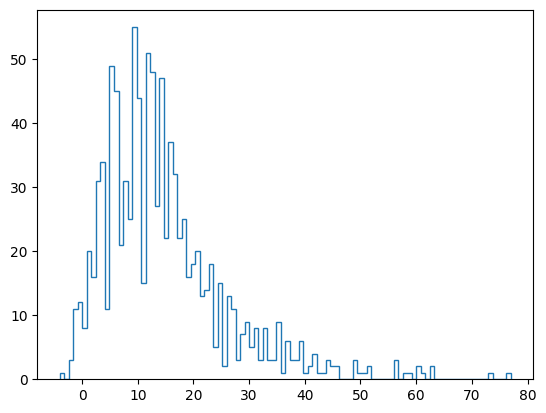

In [4]:
vals, bins = np.histogram(list_Energy, bins=100)
print(f"The minimum energy is {min(list_Energy)}ϵ")
plt.stairs(vals, bins, label="histogram")

In [5]:
#print(list_Energy)

Text(0.5, 1.0, 'Heat map of length and energy of the polymers')

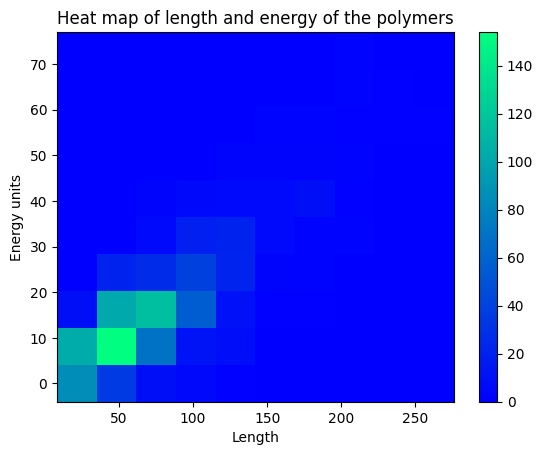

In [6]:
plt.hist2d(list_Length, list_Energy, cmap="winter")
plt.colorbar()
plt.xlabel("Length")
plt.ylabel("Energy units")
plt.title("Heat map of length and energy of the polymers")

From the histogram we clearly see a positive correlation between length and energy of the polymer.